# Rideshare Analysis:

* Even though suburban and rural cities have larger average fares then urban cities, urban cities have significant more drivers and higher ride counts. The data suggests that opportunity for fares is more important than fare size when determining where to drive.
* The bulk of money is made in urban cities but drivers can maximize their earnigns by working in a suburban city.
* It seems that rural cities are the least predictable when it comes to fare size.

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"



In [2]:
# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber_data = pd.merge(city_data, ride_data, on='city', how='outer')
# Display the data table for preview
pyber_data.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [3]:
# Obtain the x and y coordinates for each of the three city types
# Group the data by city & type
city_groupby = pyber_data.groupby(['city'])
#city_groupby.head()

# X axis - get the rides for each city
city_rides = city_groupby.count()['ride_id']


# Y axis - get the average fare for each city
avg_fare = city_groupby.mean()['fare']
avg_fare = round(avg_fare, 2)
#avg_fare


# get the drivier count for each city. This determines the size of the circles
city_data.drop_duplicates('city')
driver_count = city_data.set_index('city')['driver_count']

# get the the type for each city. 
city_type = city_data.set_index('city')['type']


In [4]:
# create dataframes for Urban, Suburban and Rural

pyber_df = pd.DataFrame({'city_type': city_type, 'rides per city': city_rides, 'avg fare': avg_fare, '# of drivers': driver_count})

urban_df = pyber_df.loc[pyber_df['city_type'] == 'Urban',:]
suburban_df = pyber_df.loc[pyber_df['city_type'] == 'Suburban',:]
rural_df = pyber_df.loc[pyber_df['city_type'] == 'Rural',:]


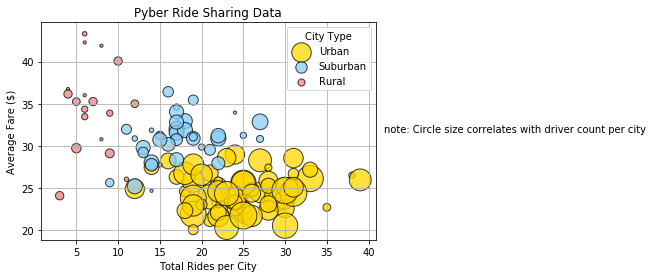

In [5]:
# Build the scatter plots for each city types
plt.scatter(urban_df['rides per city'], urban_df['avg fare'], s=urban_df['# of drivers'] * 10, c='gold', edgecolors='black', label='Urban', alpha=.75)
plt.scatter(suburban_df['rides per city'], suburban_df['avg fare'], s=suburban_df['# of drivers'] * 10, c='lightskyblue', edgecolors='black', label='Suburban', alpha=.75)
plt.scatter(rural_df['rides per city'], rural_df['avg fare'], s=rural_df['# of drivers'] * 10, c='lightcoral', edgecolors='black', label='Rural', alpha=.75)

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data")
plt.xlabel("Total Rides per City")
plt.ylabel("Average Fare ($)")
plt.grid()

# Create a legend
plt.legend(title='City Type')

# Incorporate a text label regarding circle size
plt.figtext(.92, .5, 'note: Circle size correlates with driver count per city')
# Save Figure
plt.savefig('Pyber Rideshare Data.png')
# Show plot
plt.show()

## Total Fares by City Type

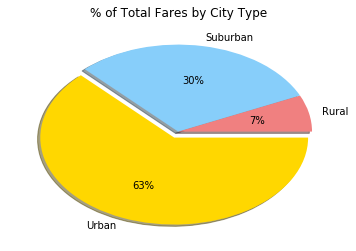

In [6]:
# Calculate Type Percents
# Group the data by city type. Use original dataframe where fares aren't averaged
city_type_data = pyber_data.groupby('type')['driver_count','type', 'fare', 'ride_id']
city_type_data.head()

# get list of total fares for each city type
fares_bytype = city_type_data.sum()['fare']

labels = fares_bytype.index.values

# colors array can be used for all pie charts
colors = ['lightcoral', 'lightskyblue', 'gold']

# Build Pie Chart
plt.pie(fares_bytype, explode=[0,0,.075], labels=labels, colors=colors, shadow=True, autopct='%1.0f%%')
plt.title('% of Total Fares by City Type')
plt.axis
# Save Figure
plt.savefig('percent of fares.png')

## Total Rides by City Type

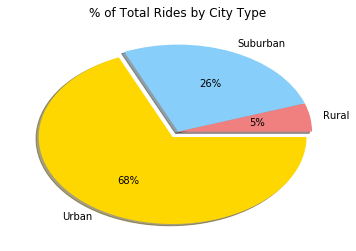

In [7]:
# Calculate Ride Percents
# Use previously created 'city_type_data'
rides_bytype = city_type_data.count()['ride_id']

labels = rides_bytype.index.values

# Build Pie Chart
plt.pie(rides_bytype, explode=[0,0,.075], labels=labels, colors=colors, shadow=True, autopct='%1.0f%%')
plt.title('% of Total Rides by City Type')
plt.axis

# Save Figure
plt.savefig('percent of rides.png')

## Total Drivers by City Type

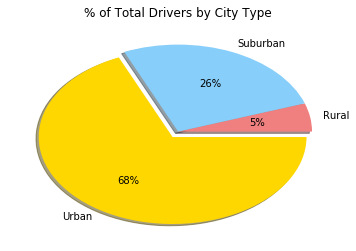

In [8]:
# Calculate Driver Percents
# Use previously created modified 'city_data' for calculation
city_data_drivers = city_data.groupby('type')['driver_count', 'type']
drivers_bytype = city_data_drivers.sum()['driver_count']

labels = drivers_bytype.index.values

# Build Pie Chart
plt.pie(rides_bytype, explode=[0,0,.075], labels=labels, colors=colors, shadow=True, autopct='%1.0f%%')
plt.title('% of Total Drivers by City Type')
plt.axis

# Save Figure
plt.savefig('percent of drivers.png')